## Anticipating Customer Churn in Telecommunication: A Predictive Analytics Approach

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Customer.csv")

### Data Preprocessing 

In [6]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
df.drop(columns=['customerID'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.shape

(7043, 20)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [13]:
df.count()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [14]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [17]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [18]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [21]:
for i in df.columns[:]:
    print(df[i].value_counts())
    print("\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


DeviceProtection
No                     3095
Yes       

In [22]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object") 

In [23]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
df = df[df.TotalCharges!=' ']
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [25]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [26]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### EDA

In [27]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
churn_distribution

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

In [28]:
df['tenure_churn']=pd.cut(df['tenure'],bins=[0,12,24,36,48,60,72],labels=['0-1 year','1-2 year','2-3 year','3-4 year','4-5 year','5-6 year'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 year
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,1-2 year
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5-6 year
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0-1 year
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,0-1 year


In [29]:
churn_ratebytenure=df.groupby('tenure_churn')['Churn'].mean()
churn_ratebytenure.columns=['year','churn']
churn_ratebytenure

tenure_churn
0-1 year    0.476782
1-2 year    0.287109
2-3 year    0.216346
3-4 year    0.190289
4-5 year    0.144231
5-6 year    0.066098
Name: Churn, dtype: float64

In [30]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [31]:
churn_contract=df.groupby('Contract')['Churn'].mean()
churn_contract.columns=['TYPE','CHURN']
churn_contract

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64

In [32]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [33]:
churn_internet=df.groupby('InternetService')['Churn'].mean()
churn_internet

InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64

In [34]:
churn_rate_by_gender = df.groupby('gender')['Churn'].mean().reset_index()
print(churn_rate_by_gender)

   gender     Churn
0  Female  0.269595
1    Male  0.262046


In [35]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=object)

In [36]:
churn_rate_senior = df.groupby('SeniorCitizen')['Churn'].mean().reset_index()
churn_rate_senior

,SeniorCitizen,Churn
0,0,0.236503
1,1,0.416813


In [37]:
churnrate_charges=df.groupby('Churn')['MonthlyCharges'].mean()
churnrate_charges

Churn
0    61.307408
1    74.441332
Name: MonthlyCharges, dtype: float64

In [38]:
churn_rate_by_payment = df.groupby('PaymentMethod')['Churn'].mean().reset_index()
churn_rate_by_payment

,PaymentMethod,Churn
0,Bank transfer (automatic),0.167315
1,Credit card (automatic),0.152531
2,Electronic check,0.452854
3,Mailed check,0.192020


In [39]:
correlation = df['MonthlyCharges'].corr(df['Churn'])
correlation

0.19285821847007897

In [40]:
churn_rate = df.groupby('OnlineSecurity')['Churn'].mean()

print(churn_rate)

OnlineSecurity
No                     0.417787
No internet service    0.074342
Yes                    0.146402
Name: Churn, dtype: float64


In [41]:
churn_rate = df.groupby('OnlineBackup')['Churn'].mean()

print(churn_rate)

OnlineBackup
No                     0.399417
No internet service    0.074342
Yes                    0.215670
Name: Churn, dtype: float64


In [42]:
avg_monthly_charges_by_tenure = df.groupby('tenure')['MonthlyCharges'].mean()

# Display the result
print("Average Monthly Charges by Tenure:")
print(avg_monthly_charges_by_tenure)

Average Monthly Charges by Tenure:
tenure
1     50.485808
2     57.206303
3     58.015000
4     57.432670
5     61.003759
        ...    
68    73.321000
69    70.823158
70    76.378992
71    73.735588
72    80.695856
Name: MonthlyCharges, Length: 72, dtype: float64


In [43]:
internet_type=df['InternetService'].unique()
monthly_charge={}
for service in internet_type:
    charges = df[df['InternetService'] == service]['MonthlyCharges']
    monthly_charge[service] = charges

In [44]:
for service, charges in monthly_charge.items():
    print(f"Sample Monthly Charges for {service}:")
    print(charges.head())
    print()

Sample Monthly Charges for DSL:
0    29.85
1    56.95
2    53.85
3    42.30
7    29.75
Name: MonthlyCharges, dtype: float64

Sample Monthly Charges for Fiber optic:
4      70.70
5      99.65
6      89.10
8     104.80
12    100.35
Name: MonthlyCharges, dtype: float64

Sample Monthly Charges for No:
11    18.95
16    20.65
21    19.80
22    20.15
33    20.20
Name: MonthlyCharges, dtype: float64



### Data Visualization

<Axes: title={'center': 'Churn distribution'}, xlabel='Churn', ylabel='count'>

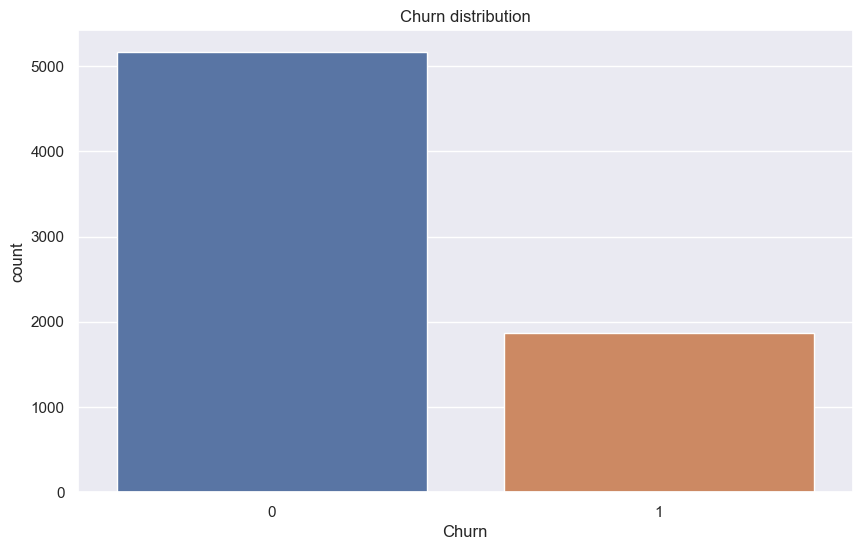

In [46]:
plt.figure(figsize=(10,6))
plt.title("Churn distribution")
sns.set()
sns.countplot(x='Churn',data=df)

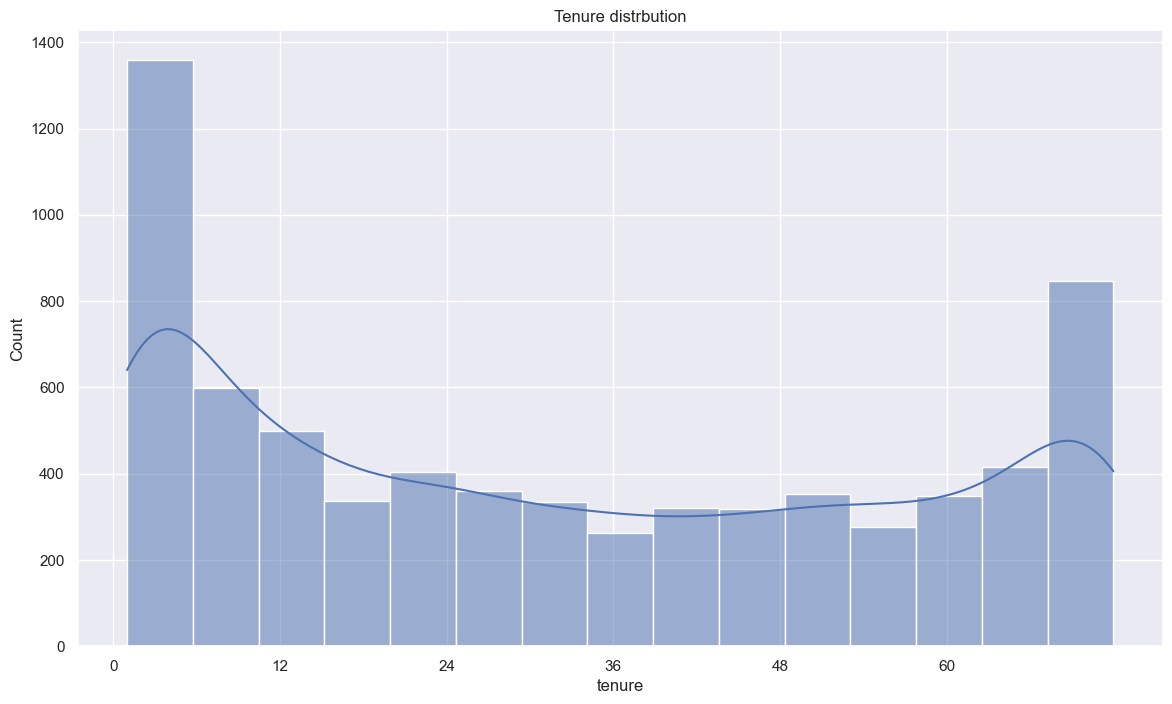

In [47]:
plt.figure(figsize=(14,8))
sns.histplot(x='tenure',data=df,kde=True)
plt.xticks(np.arange(0,72,12))
plt.title('Tenure distrbution')
plt.show()

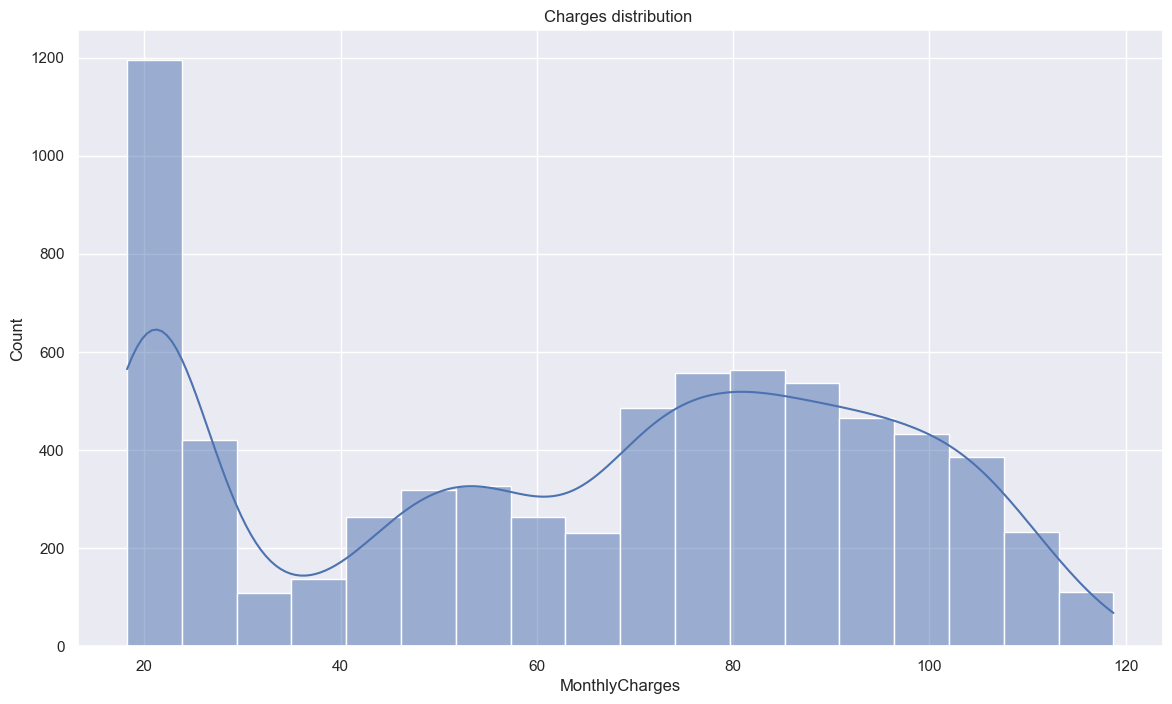

In [48]:
plt.figure(figsize=(14,8))
sns.histplot(x='MonthlyCharges',data=df,kde=True)
plt.title('Charges distribution ')
plt.show()

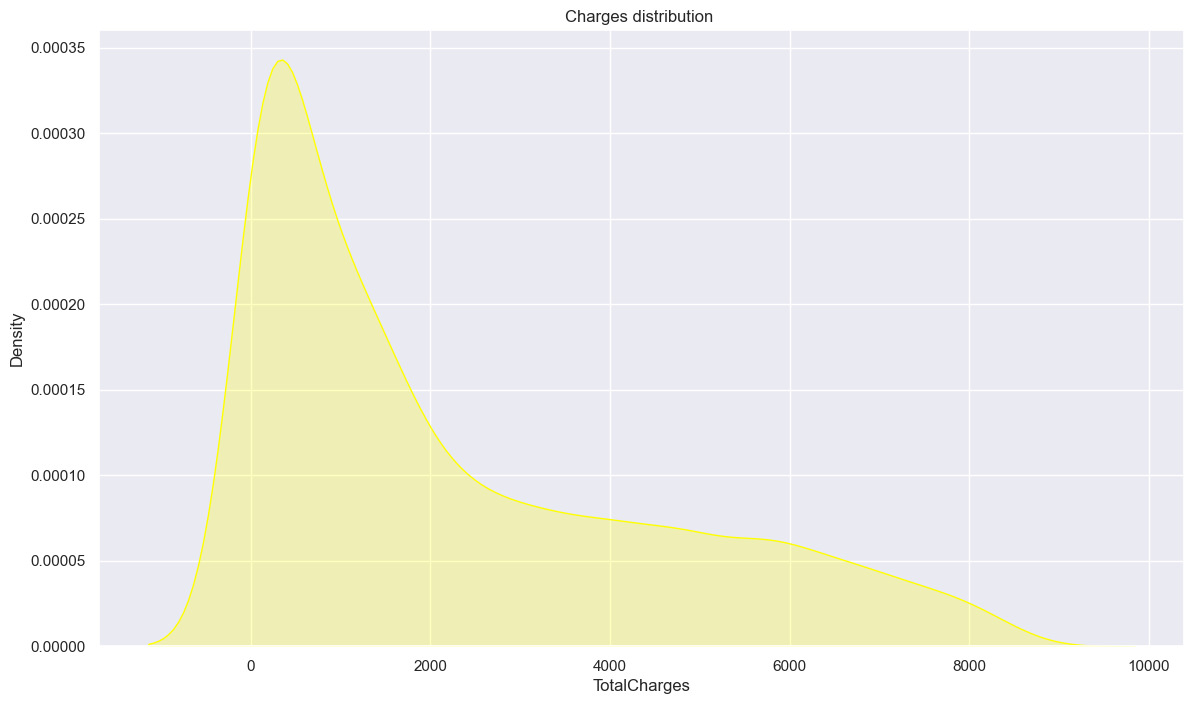

In [49]:
plt.figure(figsize=(14,8))
sns.kdeplot(df.TotalCharges,fill=True,color='yellow')
plt.title('Charges distribution ')
plt.show()

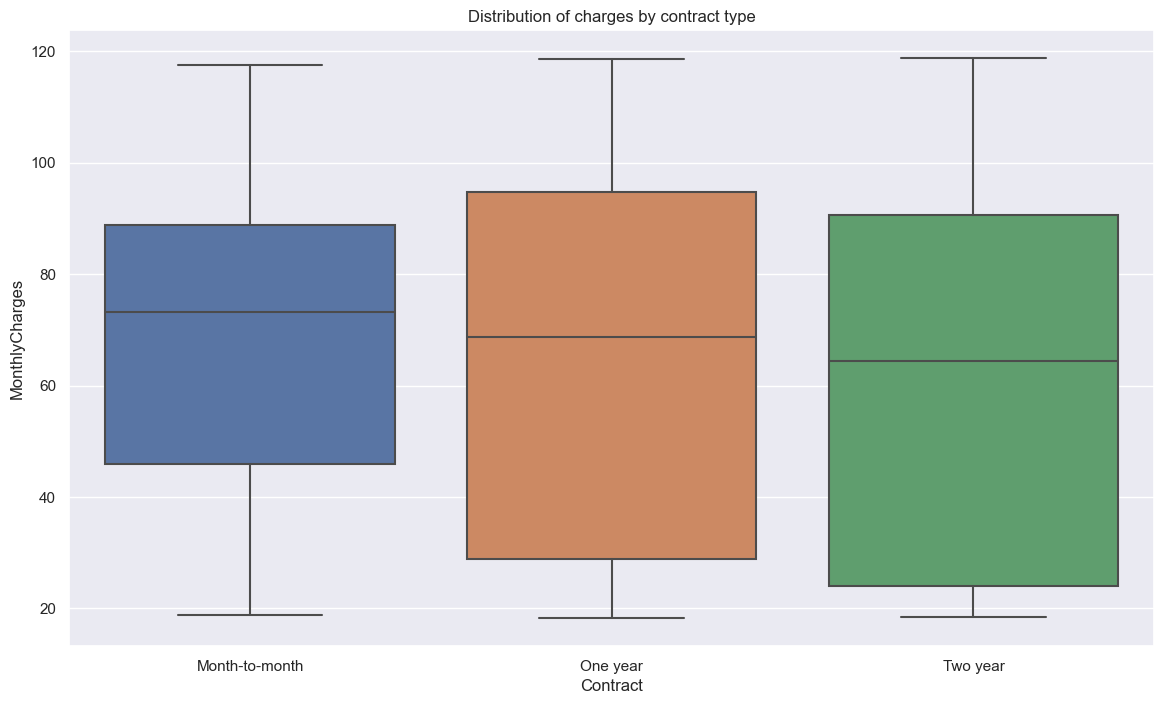

In [50]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Contract',y='MonthlyCharges',data=df)
plt.title('Distribution of charges by contract type')
plt.show()

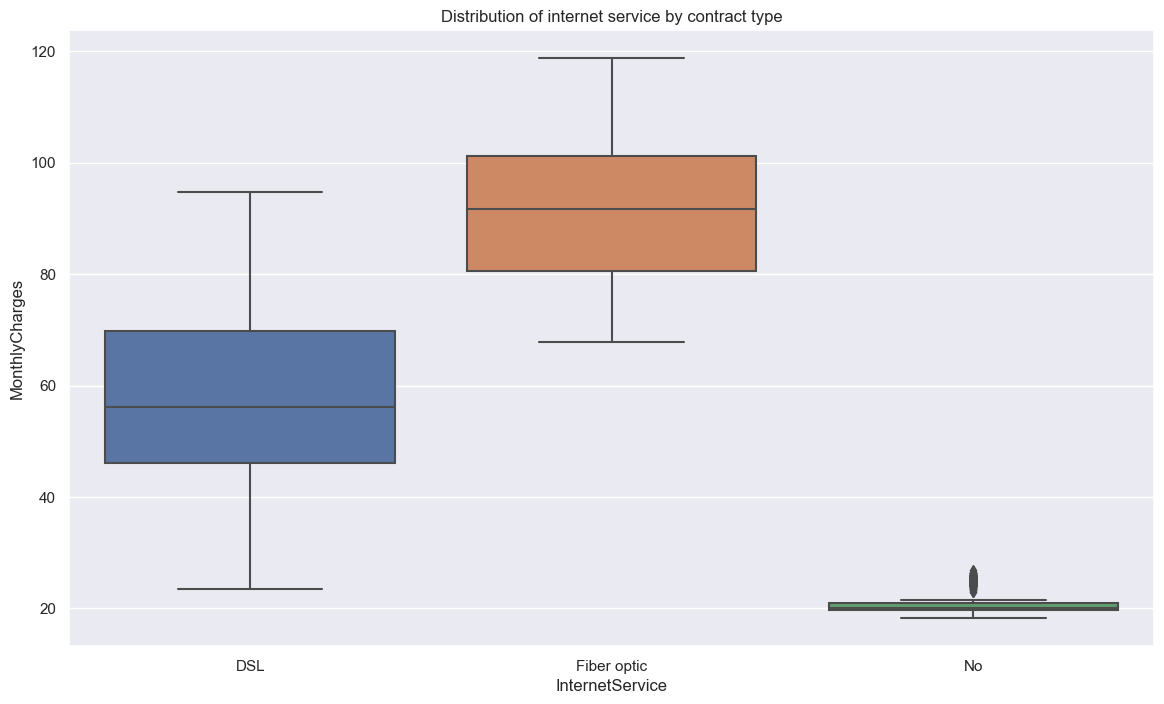

In [51]:
plt.figure(figsize=(14,8))
sns.boxplot(x='InternetService',y='MonthlyCharges',data=df)
plt.title('Distribution of internet service by contract type')
plt.show()

In [52]:
categorical = df.select_dtypes(include=['object','category']).columns.tolist()
for i in categorical:
    print(i,":",df.groupby(i).size())

gender : gender
Female    3483
Male      3549
dtype: int64
SeniorCitizen : SeniorCitizen
0    5890
1    1142
dtype: int64
Partner : Partner
No     3639
Yes    3393
dtype: int64
Dependents : Dependents
No     4933
Yes    2099
dtype: int64
PhoneService : PhoneService
No      680
Yes    6352
dtype: int64
MultipleLines : MultipleLines
No                  3385
No phone service     680
Yes                 2967
dtype: int64
InternetService : InternetService
DSL            2416
Fiber optic    3096
No             1520
dtype: int64
OnlineSecurity : OnlineSecurity
No                     3497
No internet service    1520
Yes                    2015
dtype: int64
OnlineBackup : OnlineBackup
No                     3087
No internet service    1520
Yes                    2425
dtype: int64
DeviceProtection : DeviceProtection
No                     3094
No internet service    1520
Yes                    2418
dtype: int64
TechSupport : TechSupport
No                     3472
No internet service    1520
Yes

In [53]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_churn']

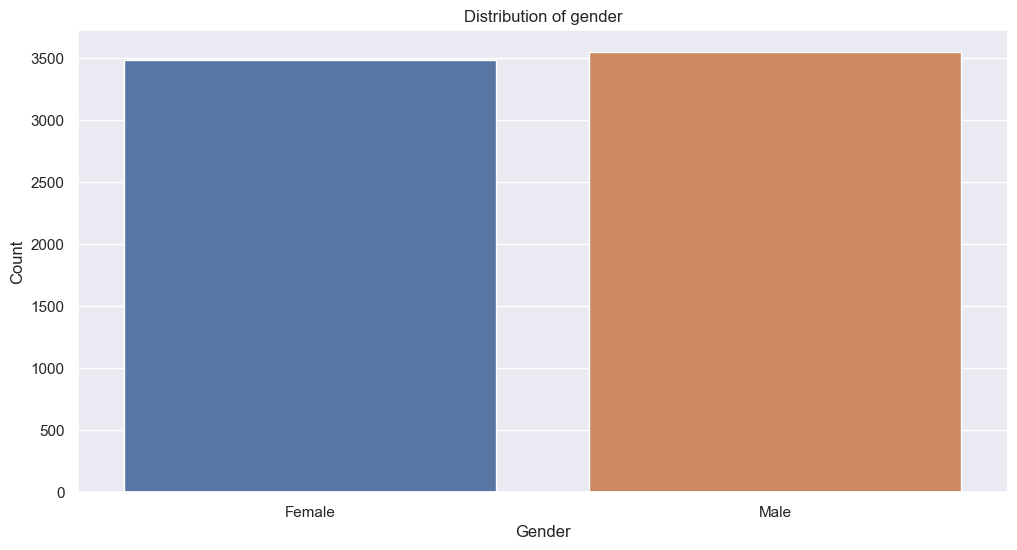

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x='gender',data=df)
plt.title('Distribution of gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

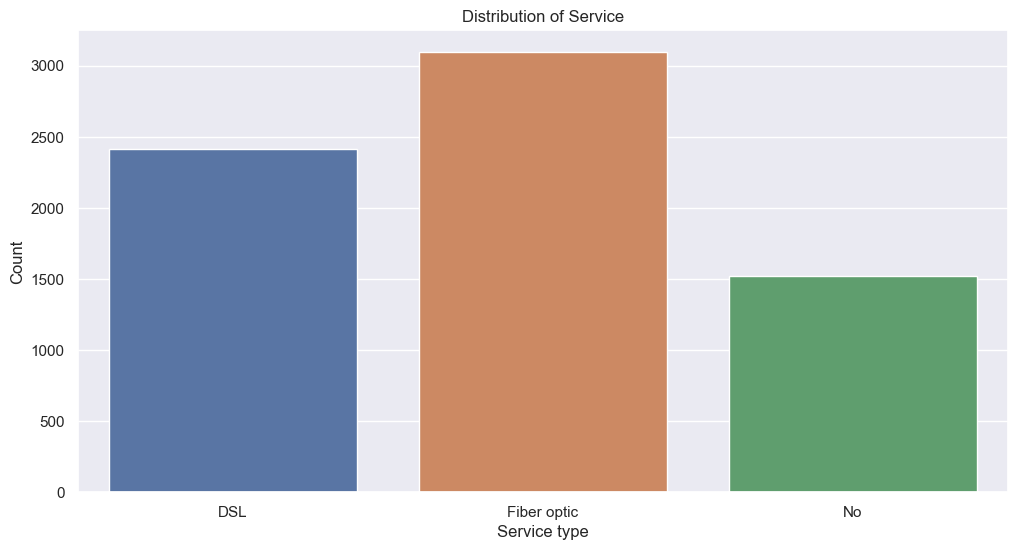

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='InternetService',data=df)
plt.title('Distribution of Service')
plt.xlabel('Service type')
plt.ylabel('Count')
plt.show()

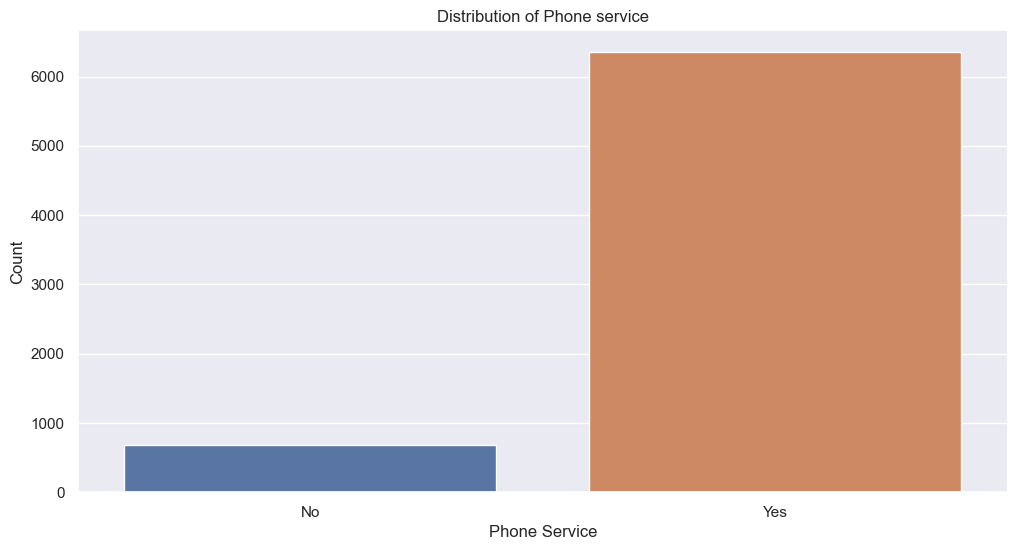

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x='PhoneService',data=df)
plt.title('Distribution of Phone service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

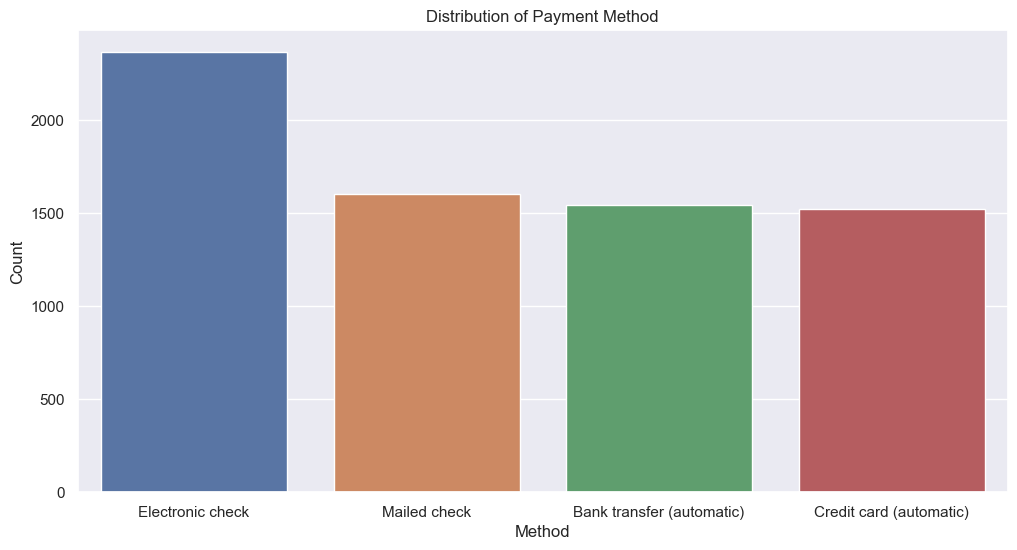

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='PaymentMethod',data=df)
plt.title('Distribution of Payment Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

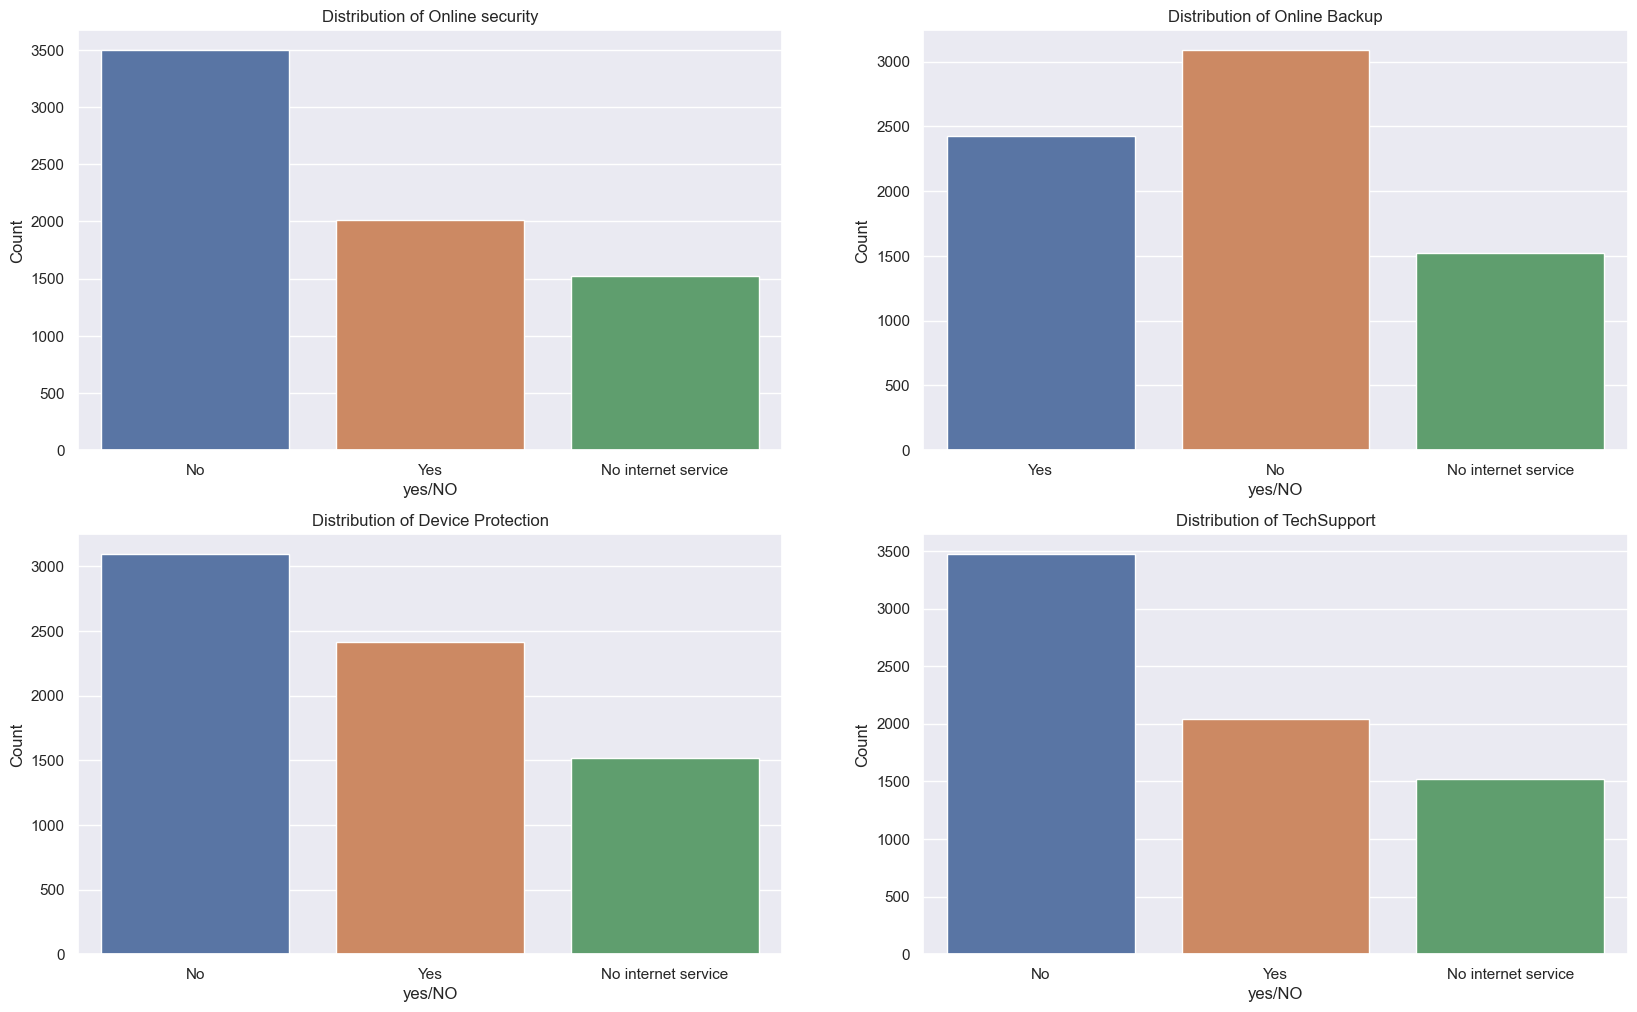

In [58]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(x='OnlineSecurity',data=df)
plt.title('Distribution of Online security')
plt.xlabel('yes/NO')
plt.ylabel('Count')
plt.subplot(2,2,2)
sns.countplot(x='OnlineBackup',data=df)
plt.title('Distribution of Online Backup')
plt.xlabel('yes/NO')
plt.ylabel('Count')
plt.subplot(2,2,3)
sns.countplot(x='DeviceProtection',data=df)
plt.title('Distribution of Device Protection')
plt.xlabel('yes/NO')
plt.ylabel('Count')
plt.subplot(2,2,4)
sns.countplot(x='TechSupport',data=df)
plt.title('Distribution of TechSupport')
plt.xlabel('yes/NO')
plt.ylabel('Count')
plt.show()

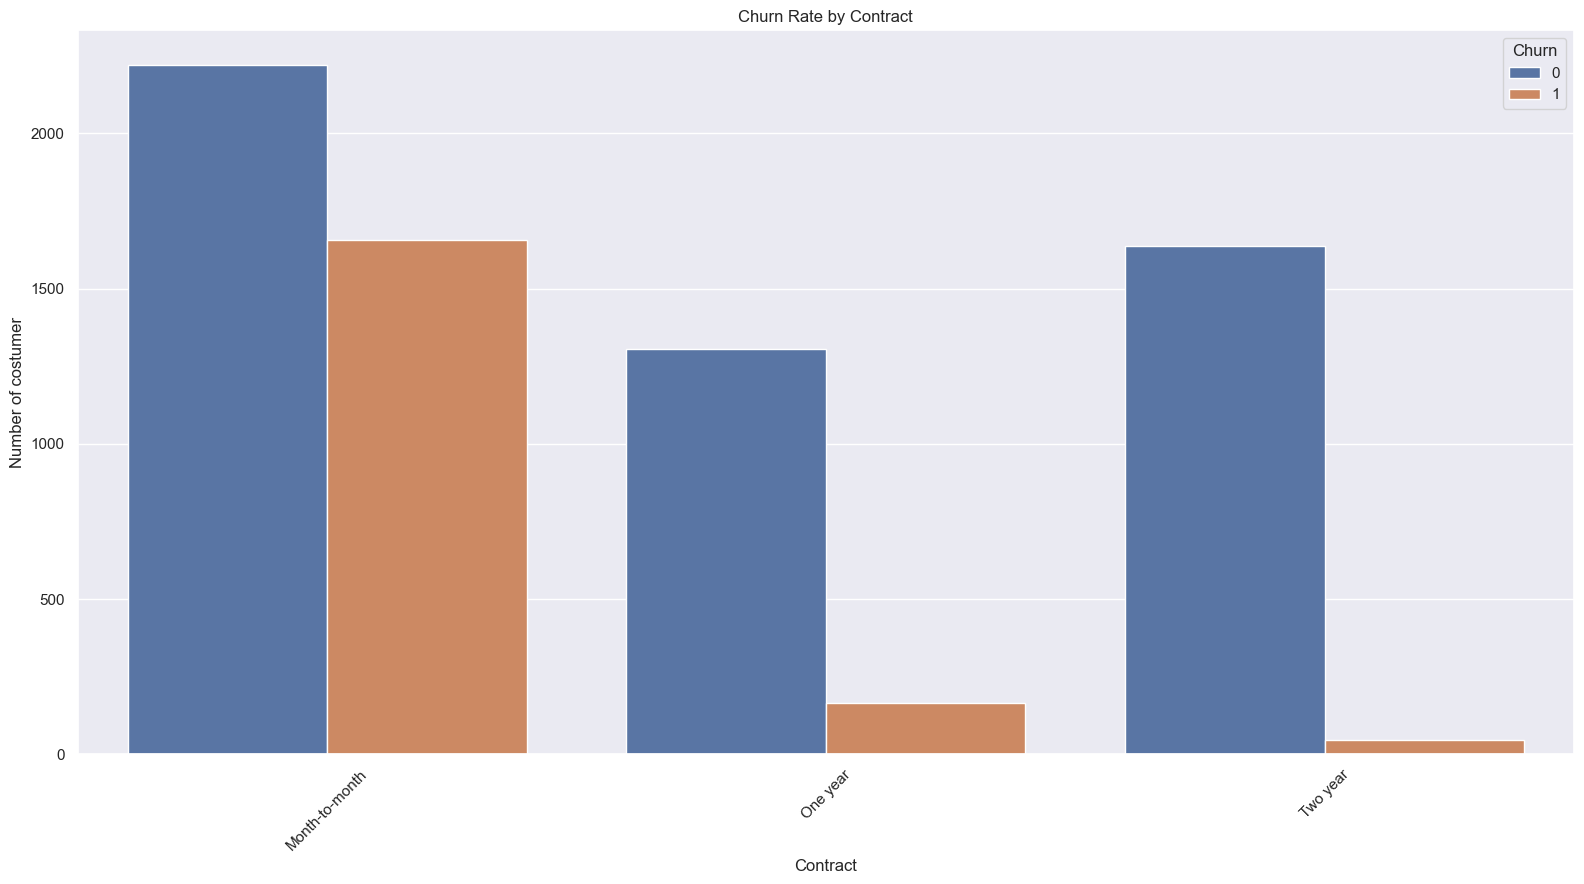

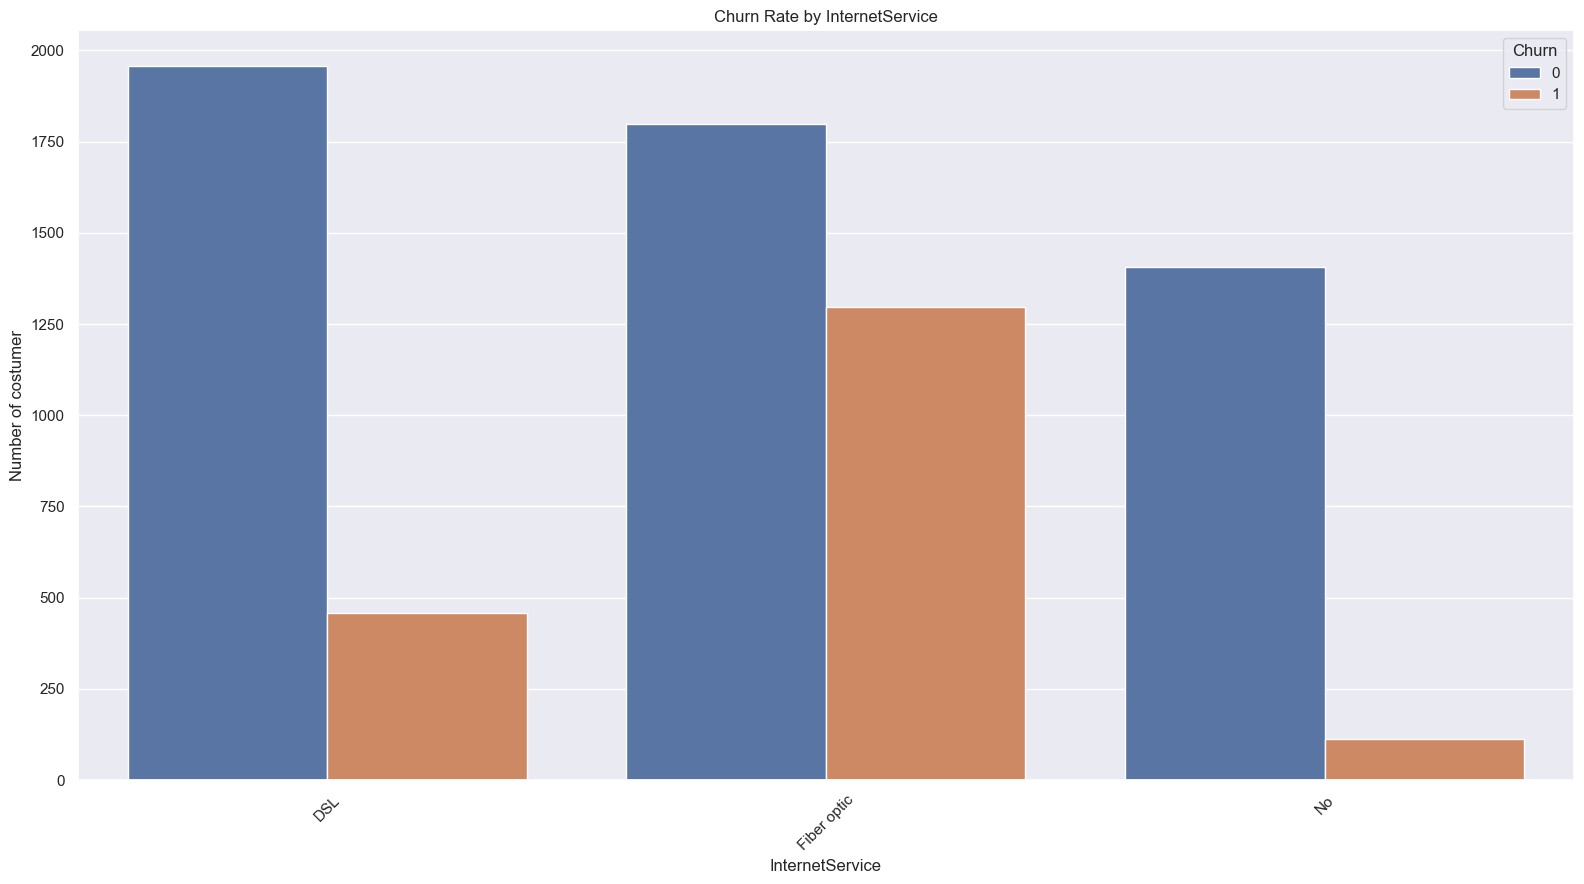

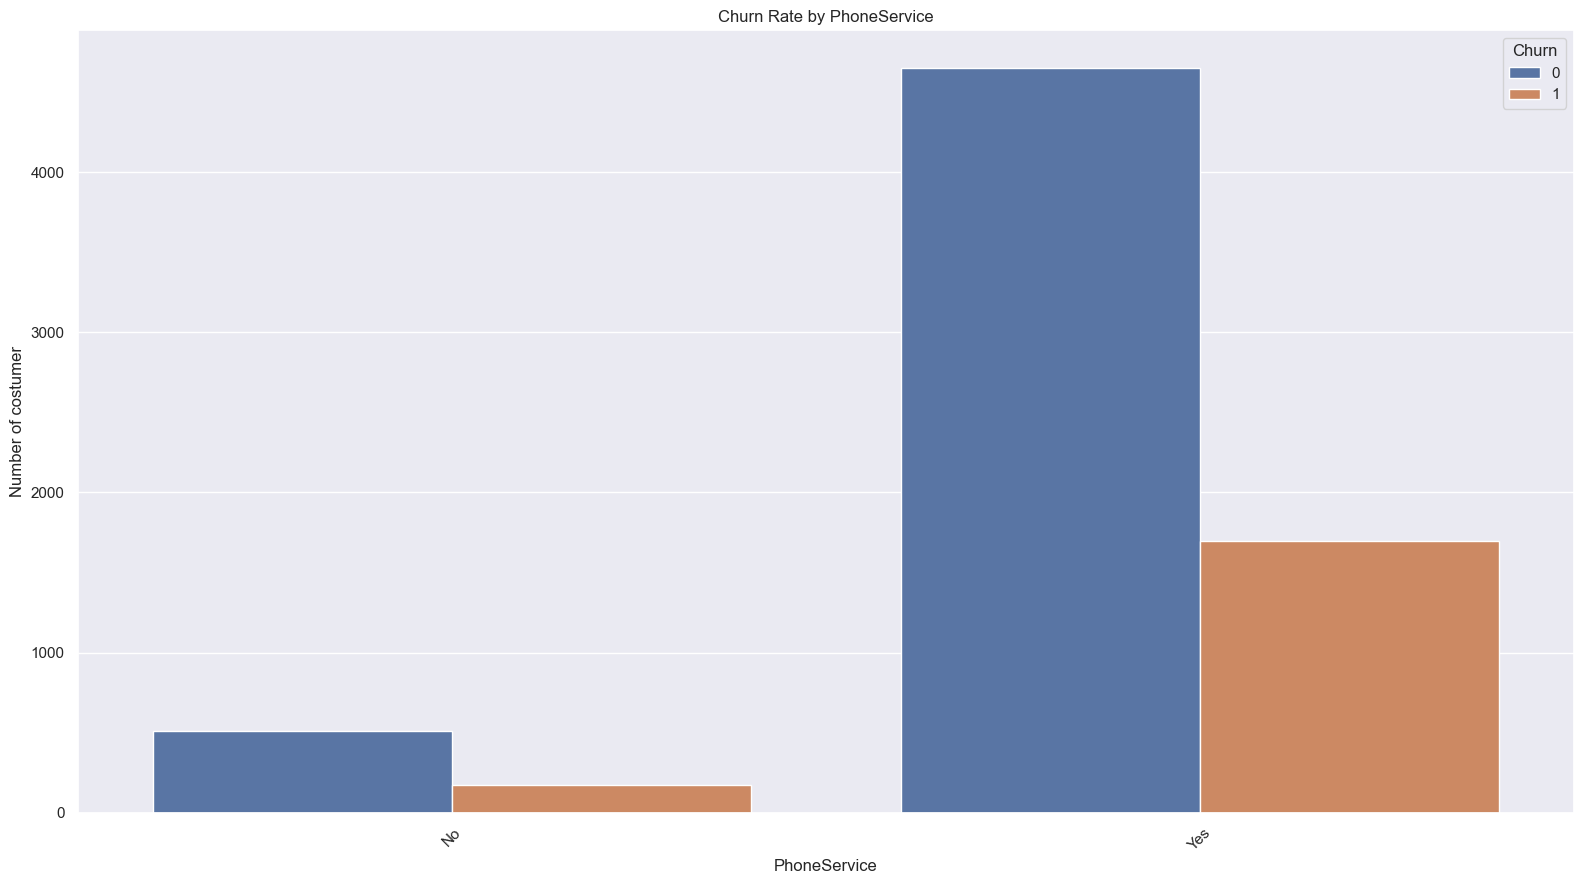

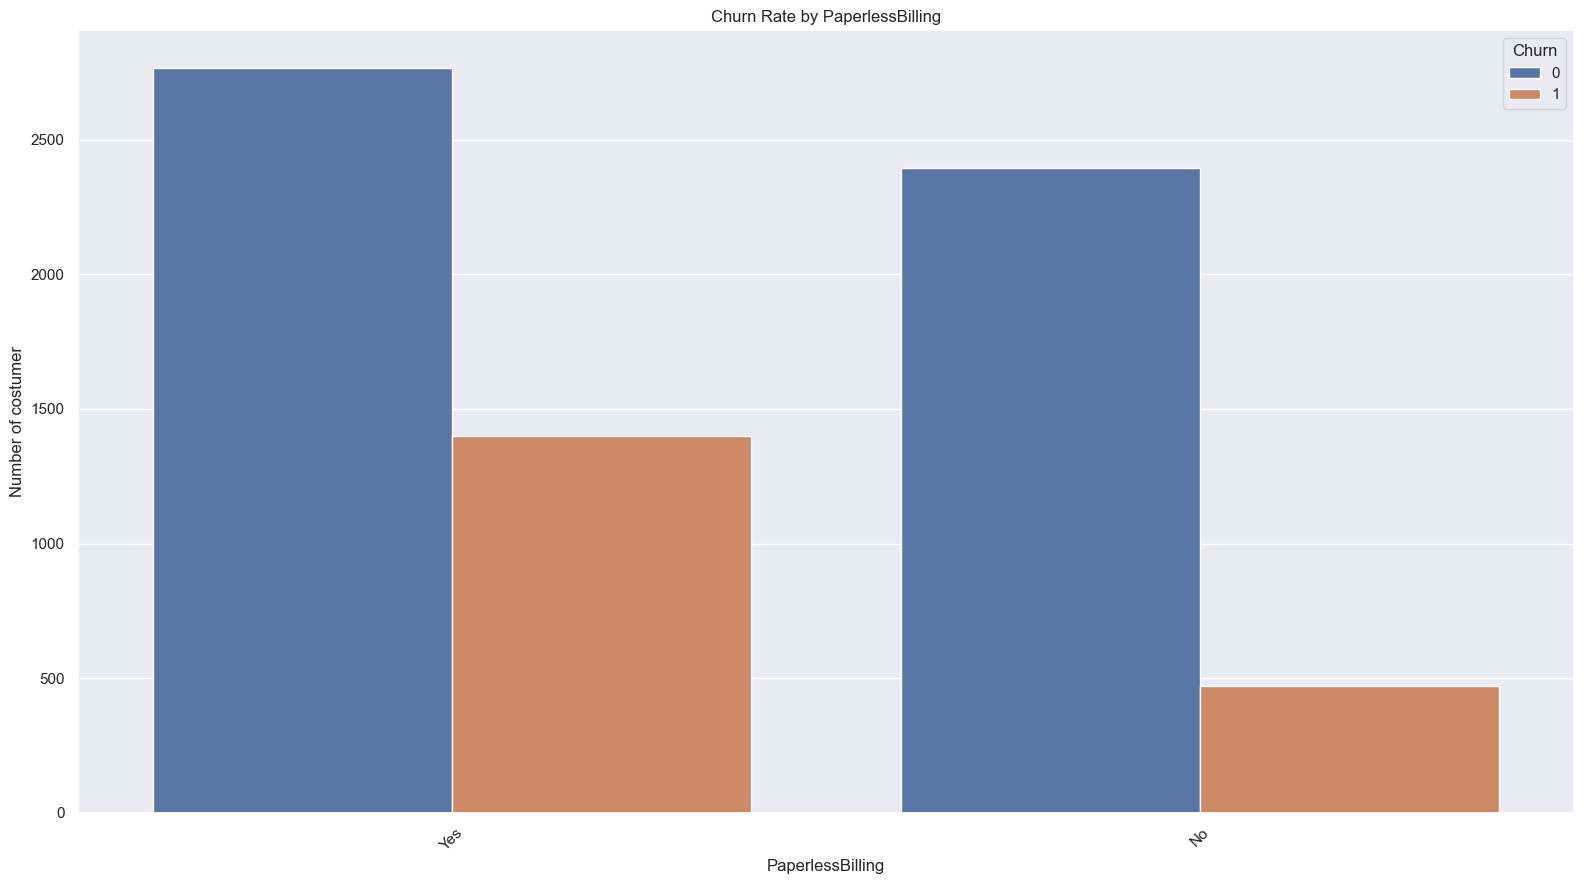

In [59]:
categorical_features = ['Contract', 'InternetService', 'PhoneService', 'PaperlessBilling']  # Add/remove features as needed
for feature in categorical_features:
    plt.figure(figsize=(16,9))
    sns.countplot(x=feature,hue='Churn',data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of costumer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x900 with 0 Axes>

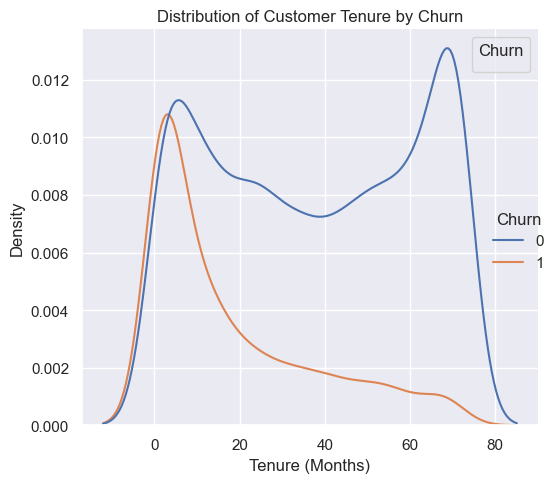

In [60]:
plt.figure(figsize=(16, 9))  
sns.displot(x='tenure', hue='Churn', kind='kde', data=df)  
plt.title('Distribution of Customer Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

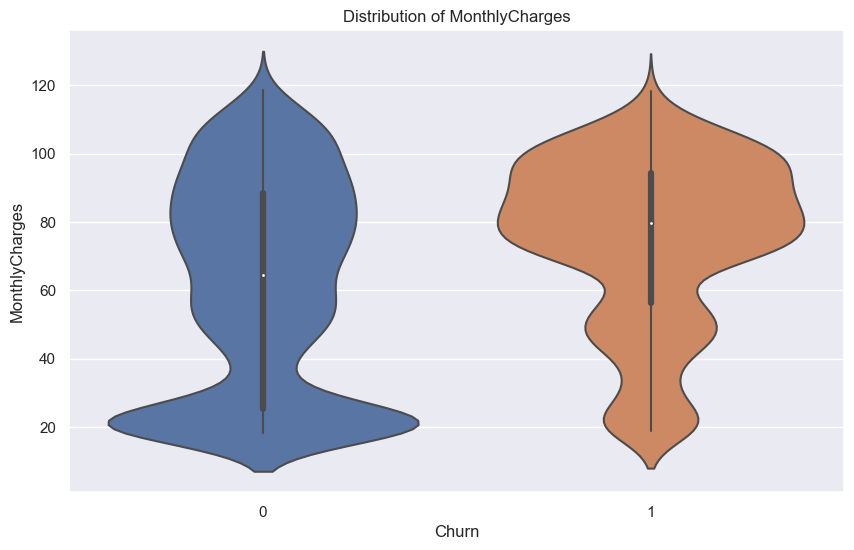

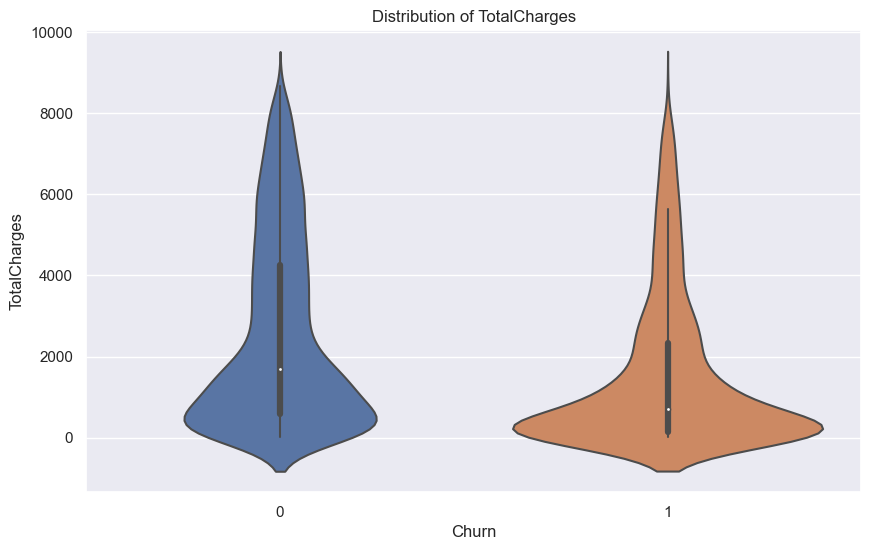

In [61]:
feature=['MonthlyCharges','TotalCharges']
for i in feature:
    plt.figure(figsize=(10,6))
    sns.violinplot(x='Churn',y=i,data=df)
    plt.xlabel('Churn')
    plt.ylabel(i)
    plt.title(f'Distribution of {i}')
    plt.show()

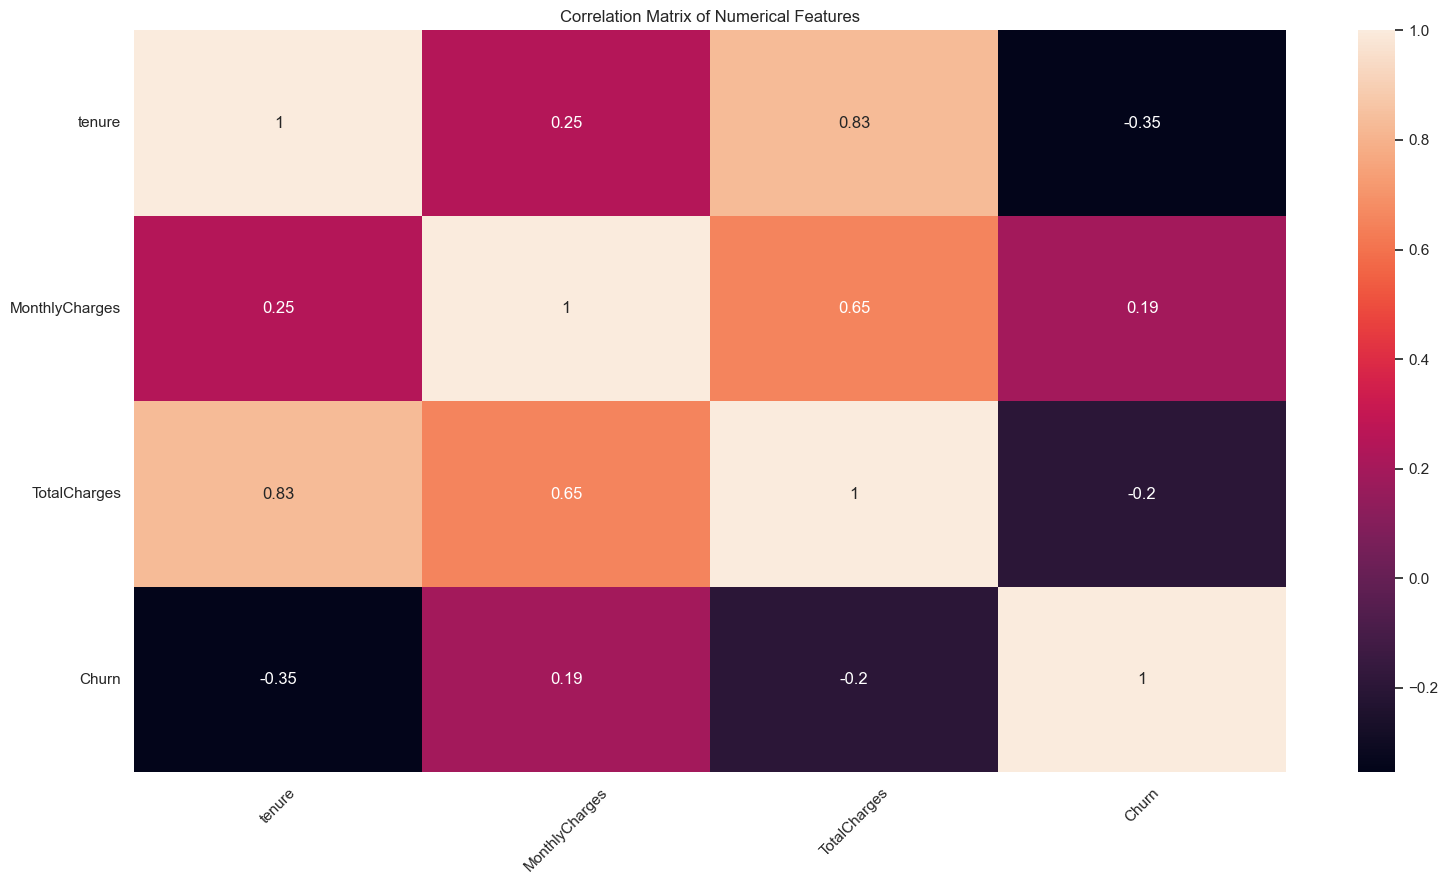

In [62]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation = df[numerical_features].corr()
plt.figure(figsize=(16,9))
sns.heatmap(data=correlation,annot=True,cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

<Figure size 1600x900 with 0 Axes>

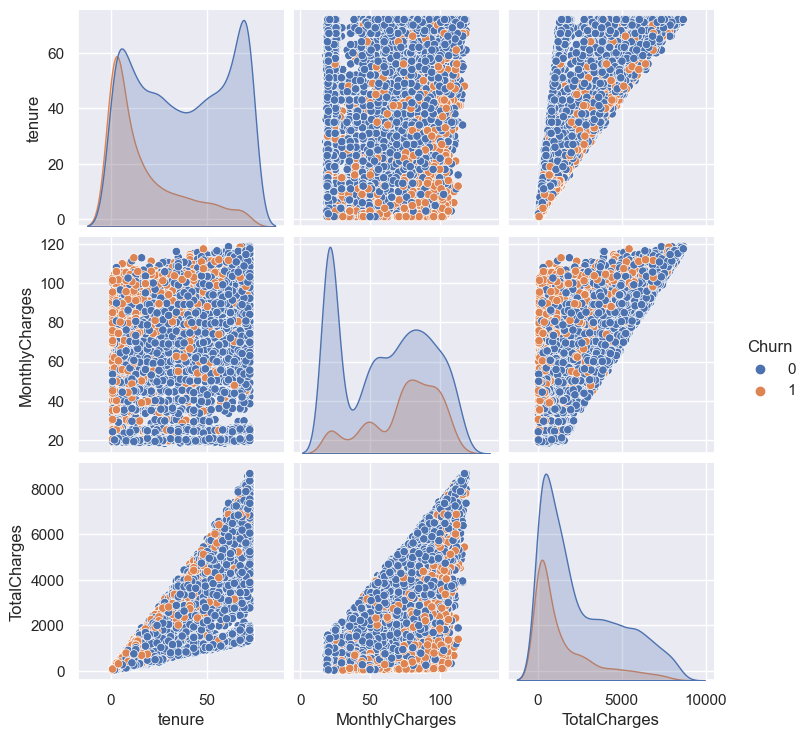

In [63]:
plt.figure(figsize=(16,9))
sns.pairplot(data=df[numerical_features],hue='Churn')

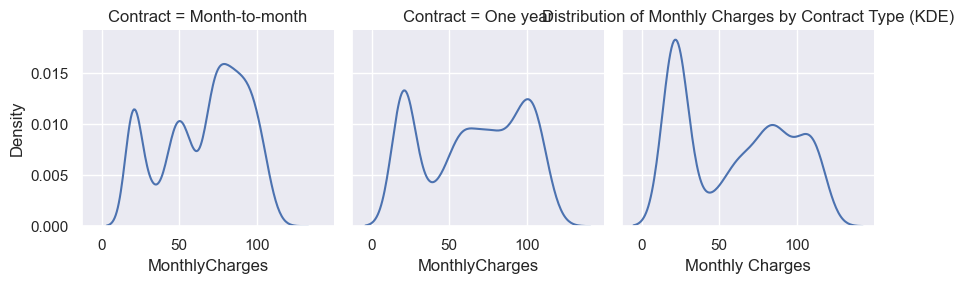

In [64]:
x = 'MonthlyCharges'  # Numerical feature
y = 'Contract'  # Categorical feature

# Create FacetGrid with KDE plots
g = sns.FacetGrid(df, col=y)  # col defines columns based on categories of 'y'
g.map(sns.kdeplot, x)  # Apply KDE plot to each subplot
plt.subplots_adjust(top=0.9)  # Adjust spacing to avoid title cutoff
plt.title('Distribution of Monthly Charges by Contract Type (KDE)')
plt.xlabel('Monthly Charges')
plt.tight_layout()
plt.show()

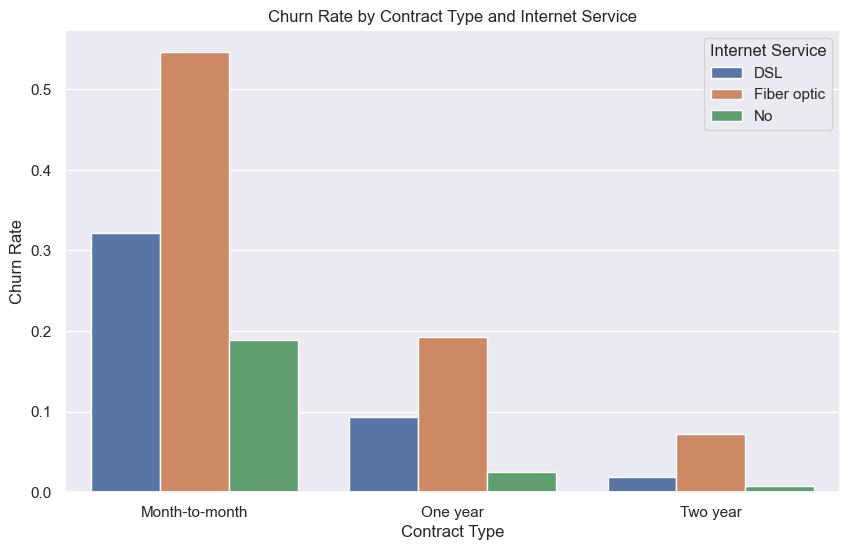

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Contract', y='Churn', hue='InternetService', errorbar=None)
plt.title('Churn Rate by Contract Type and Internet Service')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(title='Internet Service')
plt.show()

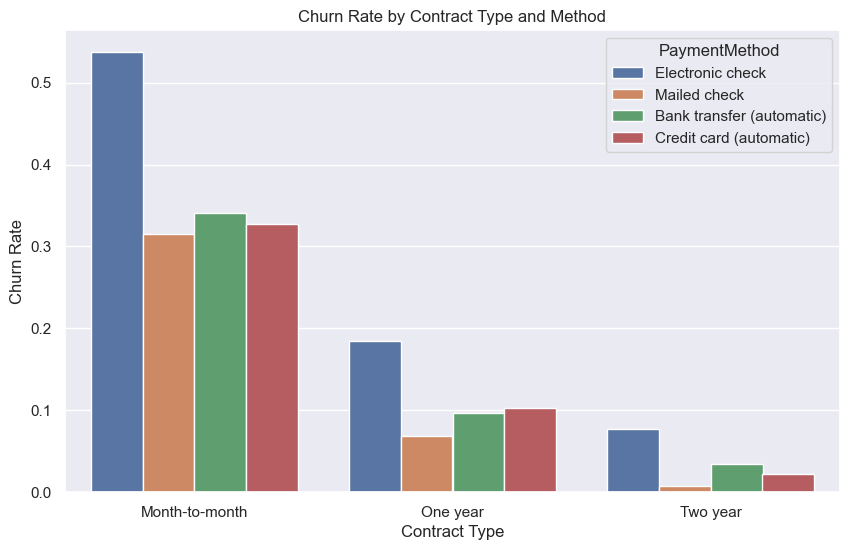

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Contract', y='Churn', hue='PaymentMethod', errorbar=None)
plt.title('Churn Rate by Contract Type and Method')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(title='PaymentMethod')
plt.show()

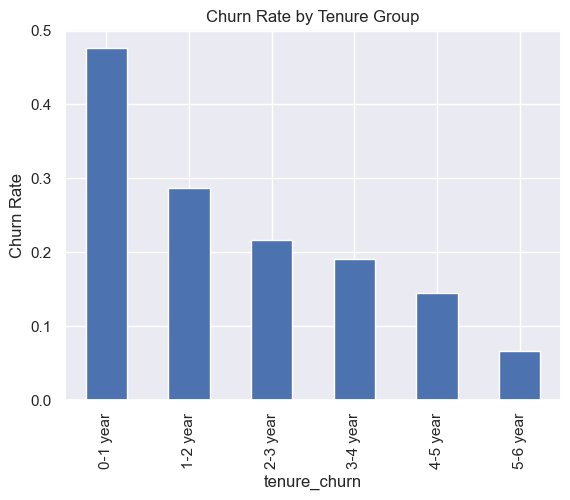

In [67]:
df.groupby('tenure_churn')['Churn'].mean().plot(kind='bar', title='Churn Rate by Tenure Group')
plt.ylabel('Churn Rate')
plt.show()

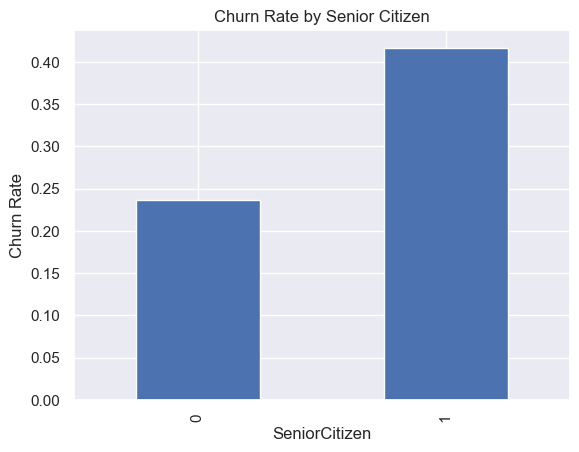

In [68]:
df.groupby('SeniorCitizen')['Churn'].mean().plot(kind='bar', title='Churn Rate by Senior Citizen')
plt.ylabel('Churn Rate')
plt.show()

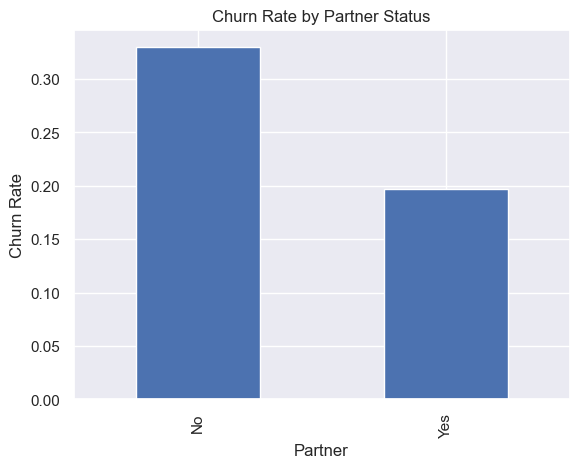

In [69]:
df.groupby('Partner')['Churn'].mean().plot(kind='bar', title='Churn Rate by Partner Status')
plt.ylabel('Churn Rate')
plt.show()

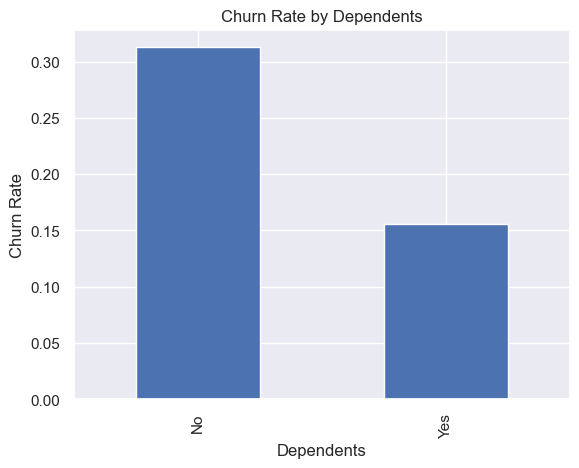

In [70]:
df.groupby('Dependents')['Churn'].mean().plot(kind='bar', title='Churn Rate by Dependents')
plt.ylabel('Churn Rate')
plt.show()

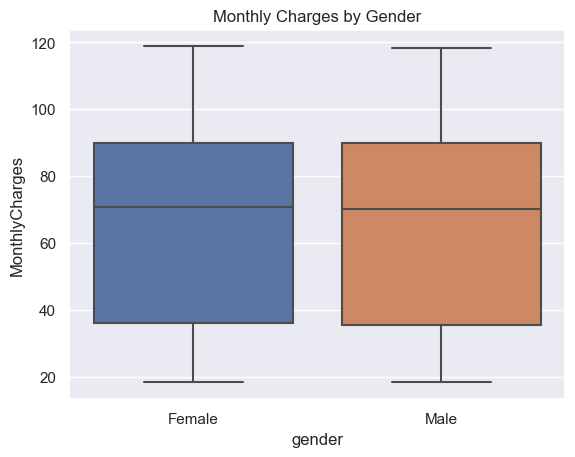

In [71]:
sns.boxplot(x='gender', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Gender')
plt.show()

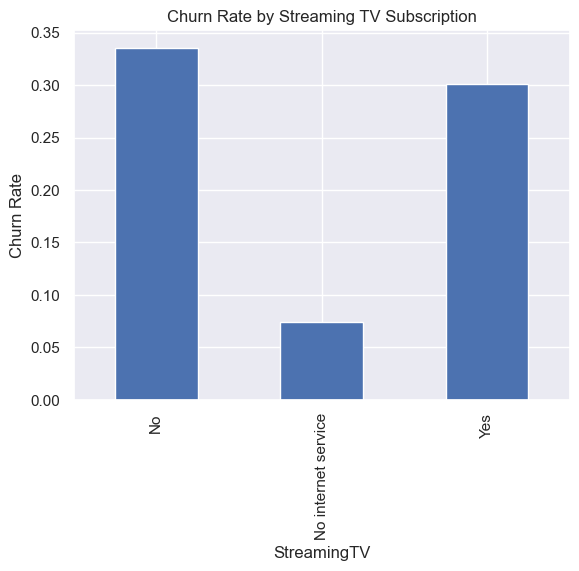

In [72]:
df.groupby('StreamingTV')['Churn'].mean().plot(kind='bar', title='Churn Rate by Streaming TV Subscription')
plt.ylabel('Churn Rate')
plt.show()

<Axes: xlabel='Churn'>

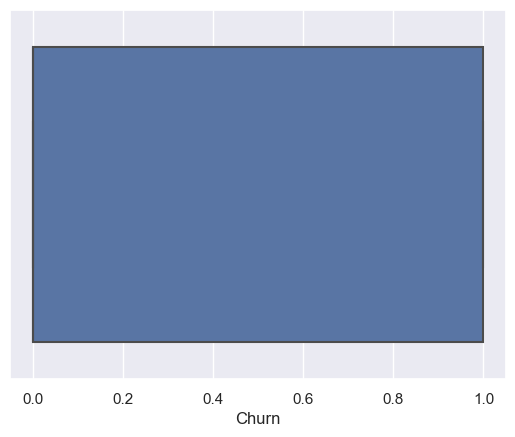

In [73]:
sns.boxplot(data=df,x='Churn')

## Logistic Regression

### Checking for autocorrelation 

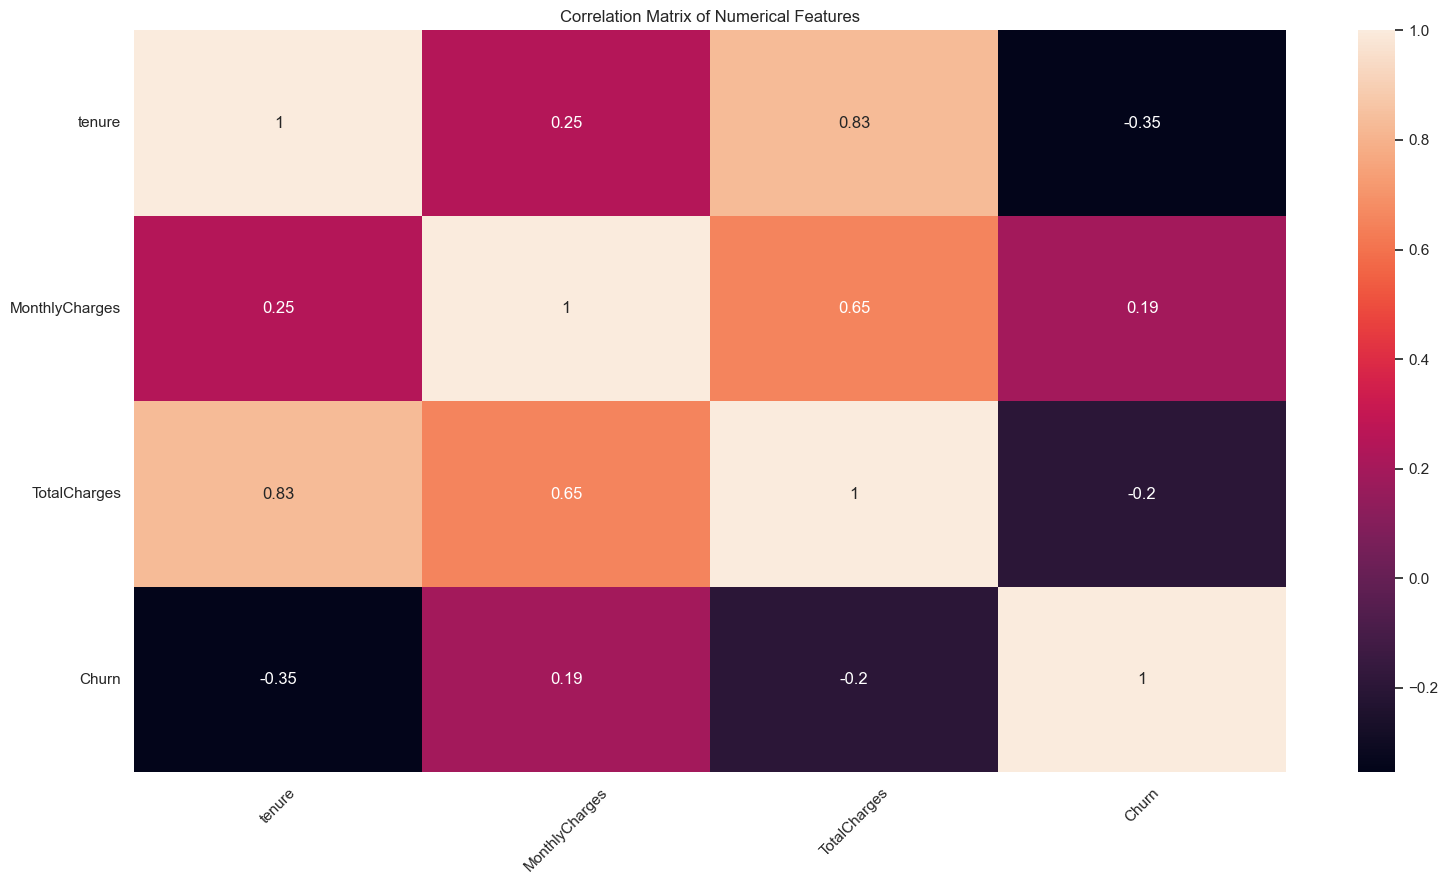

In [75]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation = df[numerical_features].corr()
plt.figure(figsize=(16,9))
sns.heatmap(data=correlation,annot=True,cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

### Checking for outliers

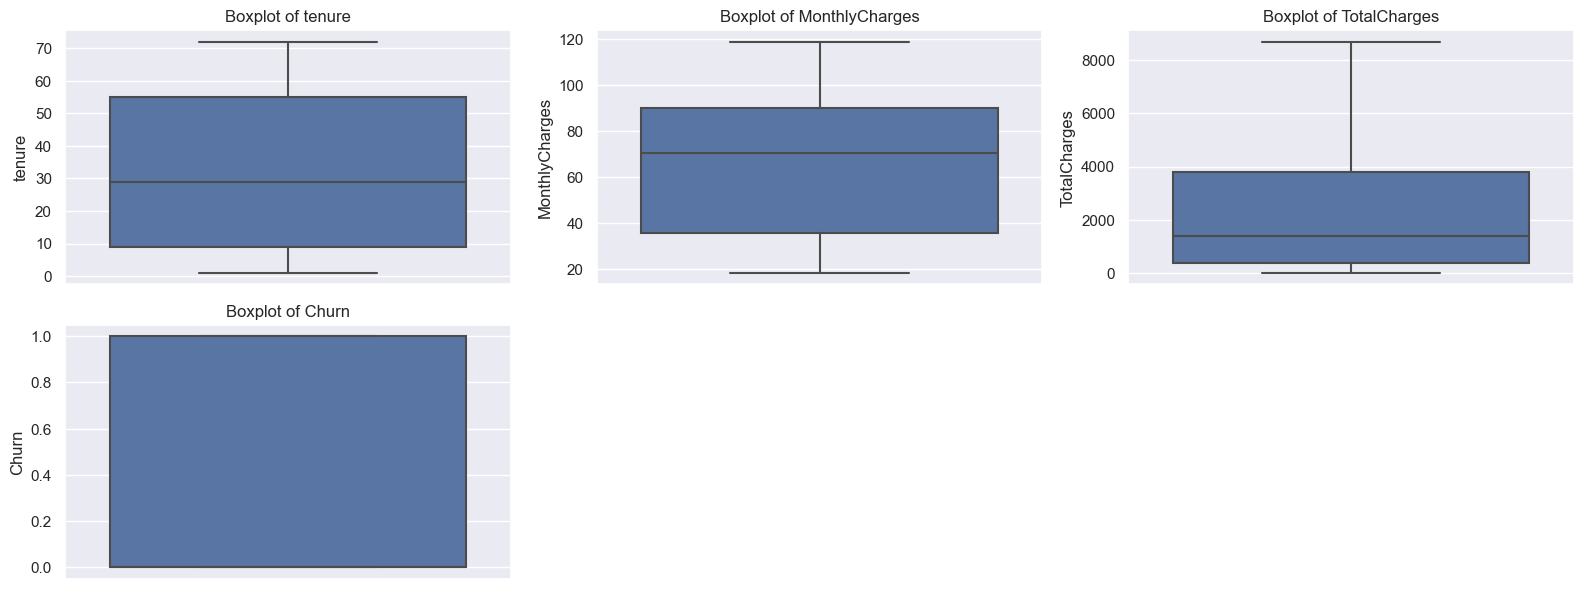

In [76]:
plt.figure(figsize=(16,9))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [77]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [78]:
print("upper limit :"+str(upper_bound)+"\n lower limit :"+str(lower_bound))

upper limit :171.27499999999998
 lower limit :-45.824999999999996


In [79]:
data = df[(df['MonthlyCharges'] >= lower_bound) & (df['MonthlyCharges'] <= upper_bound)]

In [80]:
data.shape

(7032, 21)

In [81]:
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [82]:
print("upper limit :"+str(upper_bound)+"\n lower limit :"+str(lower_bound))

upper limit :124.0
 lower limit :-60.0


In [83]:
data = df[(df['tenure'] >= lower_bound) & (df['tenure'] <= upper_bound)]

In [84]:
data.shape

(7032, 21)

In [85]:
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [86]:
print("upper limit :"+str(upper_bound)+"\n lower limit :"+str(lower_bound))

upper limit :8884.66875
 lower limit :-4688.481250000001


In [87]:
data = df[(df['TotalCharges'] >= lower_bound) & (df['TotalCharges'] <= upper_bound)]

In [88]:
data.shape

(7032, 21)

### Transforming Categorical Data: Label Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le=LabelEncoder()
for i in categorical:
    data[i]=le.fit_transform(df[i])

In [91]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_churn
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1990.50,0,1
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,7362.90,0,5
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,346.45,0,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,306.60,1,0


In [93]:
X=data.drop(columns=['Churn','tenure_churn'],axis=1)
Y=data['Churn']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [96]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [97]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [98]:
pred=classifier.predict(X_test)

In [99]:
classifier.coef_

array([[ 0.02646811,  0.05947212,  0.02593203, -0.08743094, -1.31987642,
        -0.31533679,  0.07686872,  0.16047315, -0.24295181, -0.12585705,
        -0.0941033 , -0.24879121,  0.0123663 ,  0.03258865, -0.59403525,
         0.17444969,  0.0633338 ,  0.73206823,  0.54356172]])

In [100]:
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,accuracy_score,confusion_matrix,classification_report

In [101]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

In [105]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)

# Displaying the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7945984363894811
Precision: 0.6307692307692307
Recall: 0.5481283422459893
F1 Score: 0.5865522174535049
ROC AUC Score: 0.7159809184608456
Confusion Matrix:
[[913 120]
 [169 205]]


# Assumption of linearity

In [106]:
pred_probs = classifier.predict_proba(X_train)[:, 1]

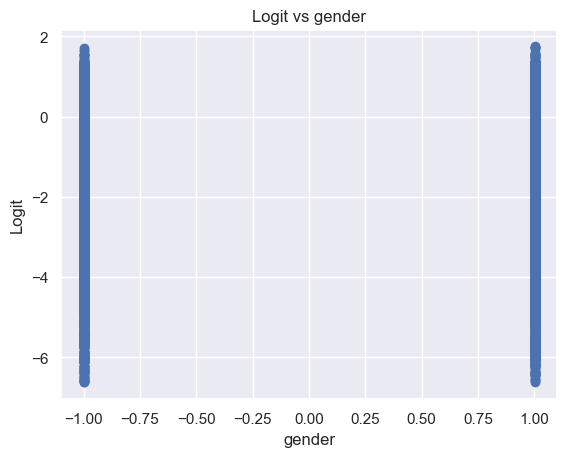

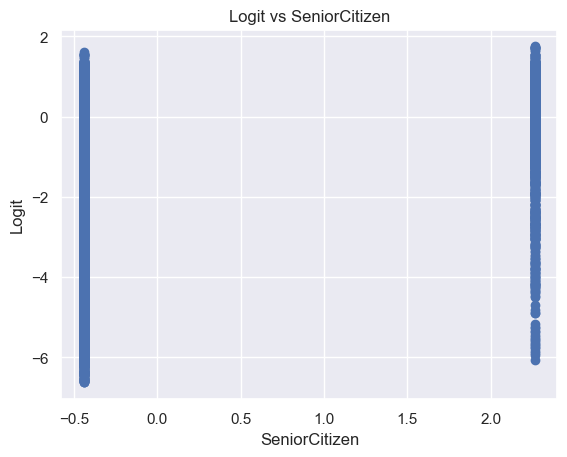

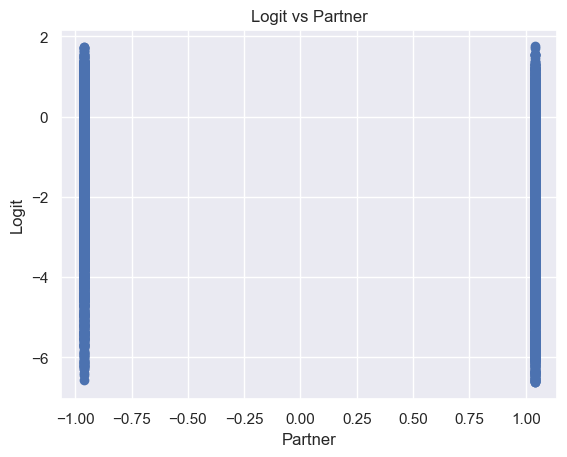

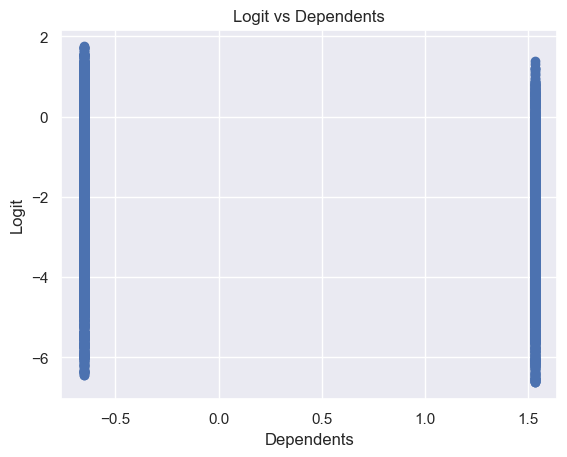

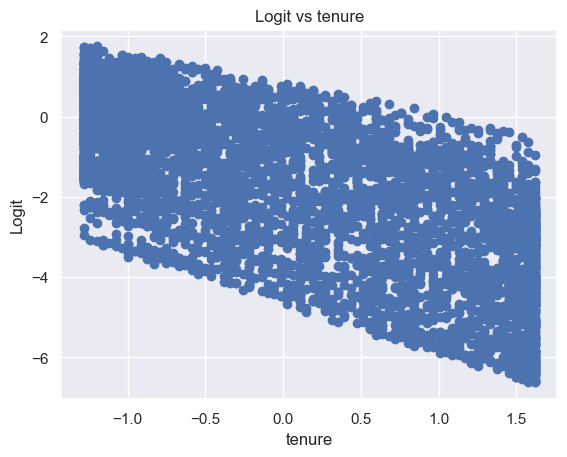

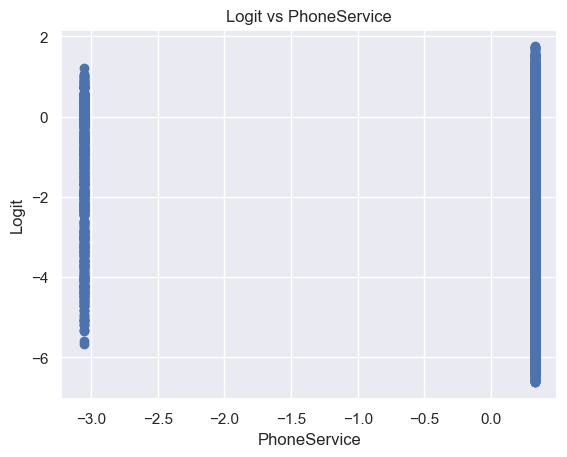

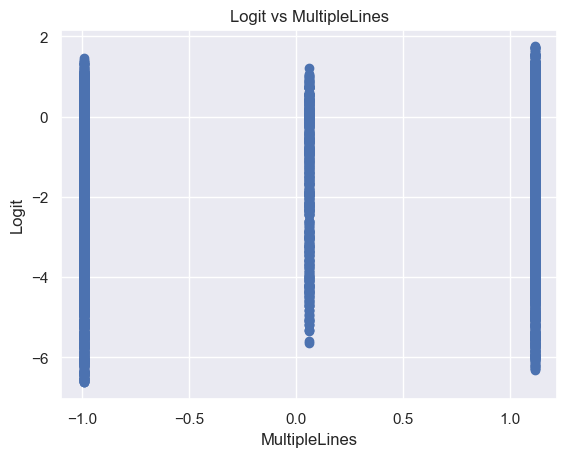

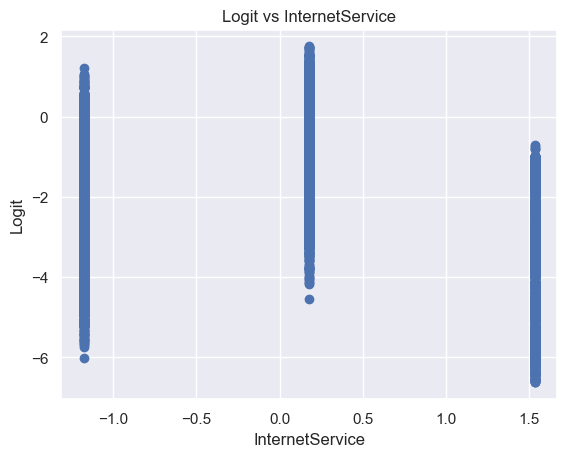

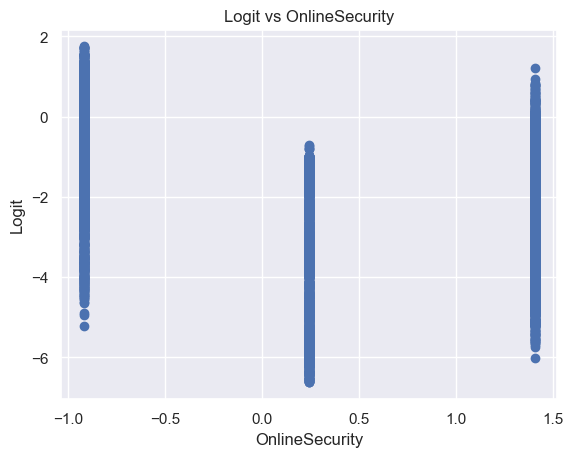

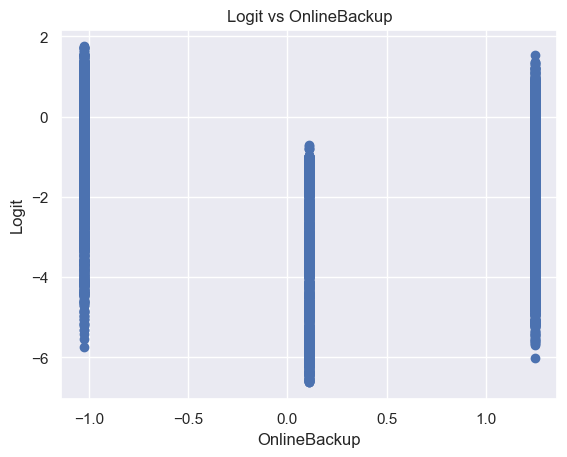

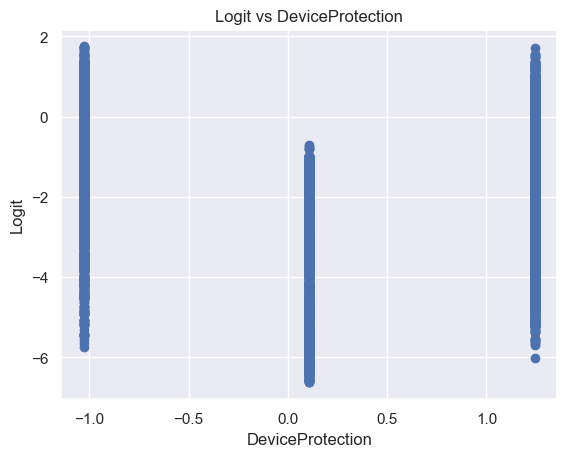

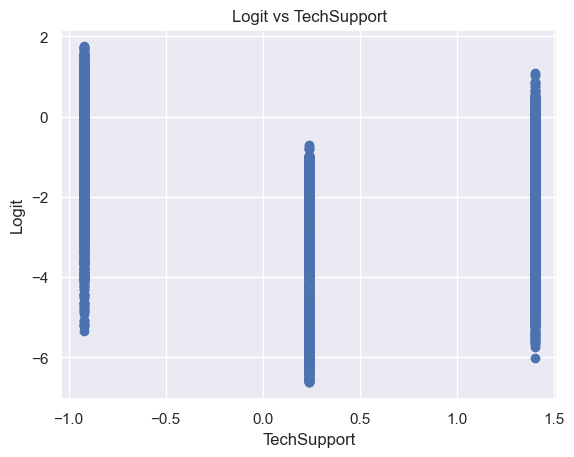

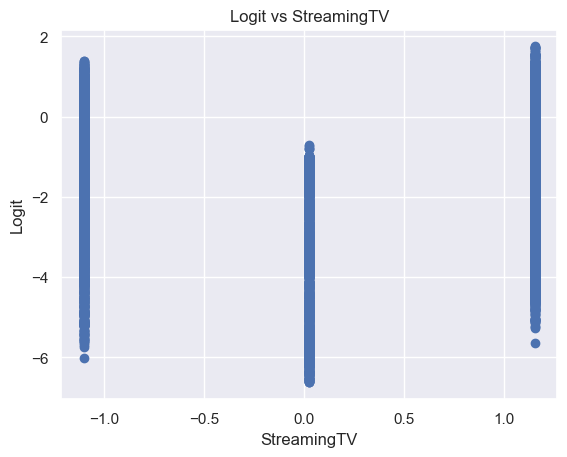

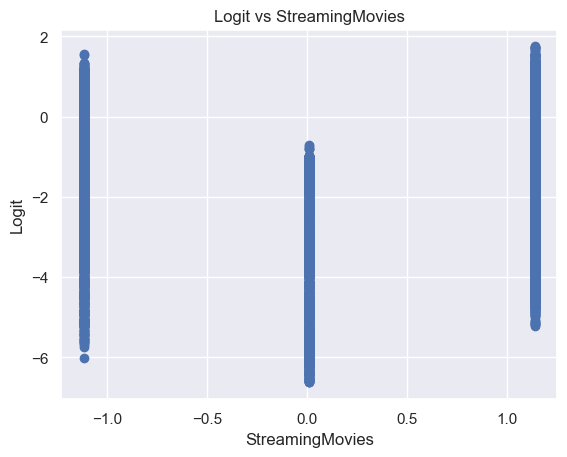

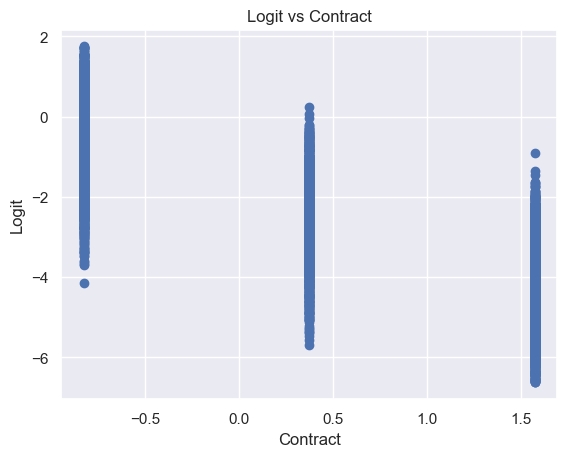

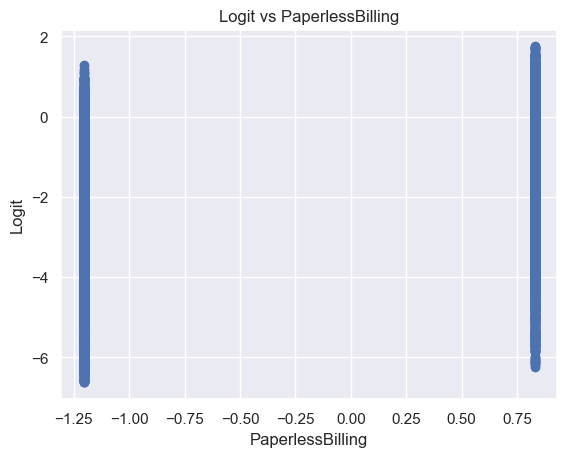

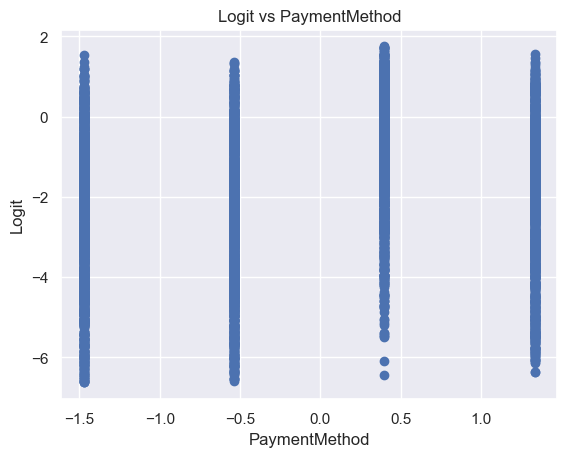

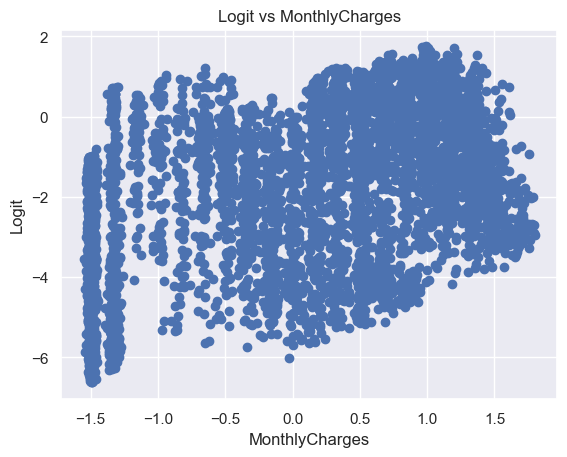

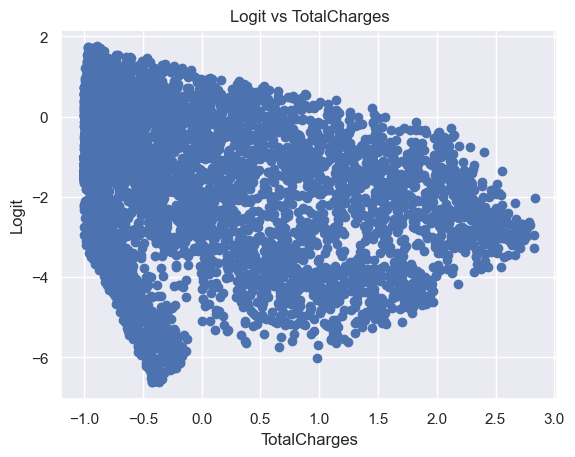

IndexError: index 19 is out of bounds for axis 1 with size 19

<Figure size 640x480 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt

# Calculate the logit (log-odds)
logit = np.log(pred_probs / (1 - pred_probs))

# Plot logit vs each continuous predictor
for i, column in enumerate(data.drop(columns=['Churn']).columns):
    plt.figure(i)
    plt.scatter(X_train[:, i], logit)
    plt.xlabel(column)
    plt.ylabel('Logit')
    plt.title(f'Logit vs {column}')
    plt.show()

# Multicollinearity

In [109]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
X = sm.add_constant(X)

In [111]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             Feature        VIF
0              const  34.800309
1             gender   1.001876
2      SeniorCitizen   1.149648
3            Partner   1.461171
4         Dependents   1.379721
5             tenure   7.493654
6       PhoneService   1.622695
7      MultipleLines   1.395898
8    InternetService   1.824359
9     OnlineSecurity   1.268758
10      OnlineBackup   1.219068
11  DeviceProtection   1.297942
12       TechSupport   1.321878
13       StreamingTV   1.446947
14   StreamingMovies   1.447896
15          Contract   2.493335
16  PaperlessBilling   1.202566
17     PaymentMethod   1.186112
18    MonthlyCharges   4.967861
19      TotalCharges  10.618697


### Remove variable with high vif 

In [128]:
X=data.drop(columns=['Churn','tenure','tenure_churn'],axis=1)
Y=data['Churn']

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [130]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
pred=classifier.predict(X_test)

In [132]:
classifier.coef_

array([[-2.00511713e-01,  2.80916856e-01, -1.13446932e-01,
        -3.58823766e-01, -6.27038955e-01,  4.67426280e-02,
         1.63676733e-01, -3.21351245e-01, -1.24865124e-01,
        -7.55673086e-02, -2.86720118e-01,  3.04198727e-02,
         3.13075545e-02, -1.12792324e+00,  1.74595161e-01,
         2.08921613e-02,  2.47253128e-02, -2.45690242e-04]])

In [133]:
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,accuracy_score,confusion_matrix,classification_report

In [134]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



In [135]:
print(confusion_matrix(y_test,pred))

[[903 130]
 [188 186]]


In [136]:
X=data.drop(columns=['Churn','tenure_churn'],axis=1)
Y=data['Churn']

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [138]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [140]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.7249466950959488
Precision: 0.4837905236907731
Recall: 0.5187165775401069
Confusion Matrix:
[[826 207]
 [180 194]]


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



In [142]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.7924662402274343
Precision: 0.6443661971830986
Recall: 0.4893048128342246
Confusion Matrix:
[[932 101]
 [191 183]]


In [144]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

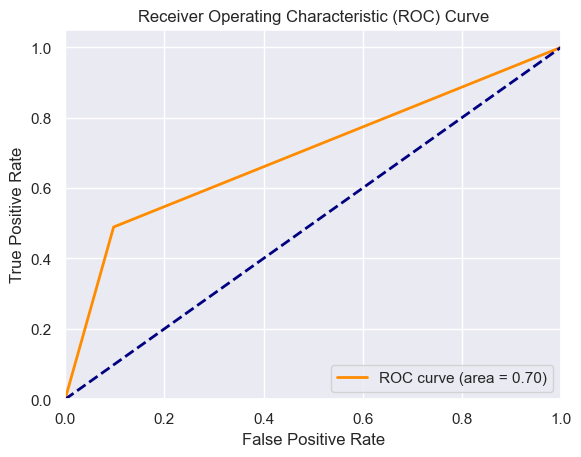

In [145]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [95]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [100]:
model = sm.OLS(Y, X)
results = model.fit()

# Sort data based on an independent variable (e.g., 'tenure')
sorted_df = data.sort_values(by='tenure')

# Split the data into two groups (e.g., top and bottom 50% based on 'tenure')
split_index = int(0.5 * len(sorted_df))
df1 = sorted_df.iloc[:split_index]
df2 = sorted_df.iloc[split_index:]

# Extract residuals for each group
resid1 = results.resid[df1.index]
resid2 = results.resid[df2.index]

# Perform Goldfeld-Quandt test
gq_test = het_goldfeldquandt(results.resid, X)
print("Goldfeld-Quandt test statistic:", gq_test[0])
print("Goldfeld-Quandt p-value:", gq_test[1])
print("F-statistic for different variances:", gq_test[2])
print("p-value for F-statistic:", gq_test[2])

Goldfeld-Quandt test statistic: 1.0675944586405808
Goldfeld-Quandt p-value: 0.026611930440514176
F-statistic for different variances: increasing
p-value for F-statistic: increasing
